# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

## Question Answers
Background work below.  Note caveats after first plot.

1)  *What test is appropriate for this problem? Does CLT apply?* 

The standard Z test is appropriate.  The degrees of freedom is large (>2000 occurrences for both "white" and "black" resumes), and the number of call backs for each race is also relatively high.  Simulation shows a very normal shape.

2) *What are the null and alternate hypotheses?*

The null hypothesis is that the difference in call backs **is not** race related, and the alternate hypothesis **is** that the difference is related to race.

3) *Compute margin of error, confidence interval, and p-value.*

From below:  Based on this analysis,the mean of the number of calls to black names/total calls is:  0.40 +/- 0.06 
and the null hypothesis is rejected.

4)  *Write a story describing the statistical significance in the context or the original problem.*

Despite the fact that this study took place 15 plus years ago, race remains one of the most polarizing issues in our society today.  The sampling methodology was very carefully crafted, but despite all efforts, on an issue such as this, clarity around the data and conclusions is paramount, and potentially more important in the effort to make progress than the actual numbers.  

Consequently, in this analysis, I looked at two things that could cloud the discussion: age discrimination, and low confidence levels.  First, the various plots across age show that the issue extends across most experience levels, wih the excepion of those just entering the workforce.  Second, it was important to test against a higher confidence level than typical.  In this case, I used a 99% confidence level which yielded a margin of uncertainty of approximately 6 percent.  When considered in context of the actual sample mean, it is very hard to dispute that in 2002, race played a significant role in the highering process.

5)*Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?*

This analysis says that race was a factor, but makes no attempt to  estimate the relative importance of that factor relative to other potential issues.  The data set is more robust than this simple analysis called for, and leaves room to delve into factors such as age, location, and industry specific bias.  

To understand the realtive weights, an analysis that focused on the relationship between factors would need to be specifically undertaken.  Tool such as covariance, pearson, and multi-dimensional plotting would play a large part in such an analysis.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
print "Call backs for black sounding names: ",sum(data[data.race=='b'].call)

# number of callbacks for white-sounding names
print "Call backs for white sounding names: ",sum(data[data.race=='w'].call)

Call backs for black sounding names:  157.0
Call backs for white sounding names:  235.0


In [5]:
data.head(3)

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,


In [7]:
# Setup two dfs to make analysis easy

just_white_df=data.loc[data.race=='w',:]
just_black_df=data.loc[data.race=='b',:]

jwd=just_white_df
jbd=just_black_df


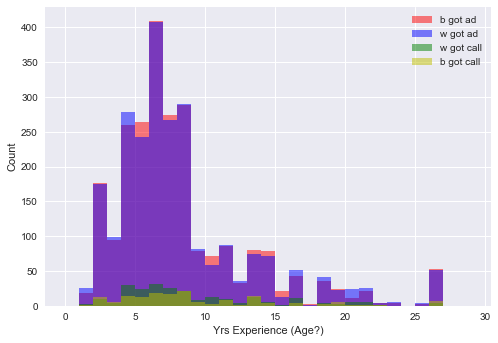

In [9]:
bins=np.arange(0,30)
plt.hist(just_black_df.yearsexp,bins,color='r',alpha=0.5,label='b got ad')
plt.hist(just_white_df.yearsexp,bins,color='b',alpha=0.5,label='w got ad')

b_call=just_black_df.loc[just_black_df.call==1,:]
w_call=just_white_df.loc[just_white_df.call==1,:]

plt.hist(w_call.yearsexp,bins,color='g',alpha=0.5,label='w got call')
plt.hist(b_call.yearsexp,bins,color='y',alpha=0.5,label='b got call')
plt.xlabel("Yrs Experience (Age?)")
plt.ylabel("Count")
plt.legend(loc="best")
plt.show()

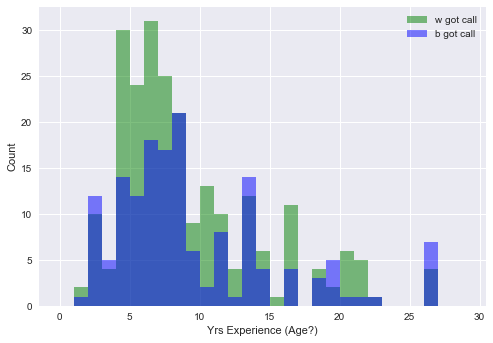

In [10]:
b_call=just_black_df.loc[just_black_df.call==1,:]
w_call=just_white_df.loc[just_white_df.call==1,:]

plt.hist(w_call.yearsexp,bins,color='g',alpha=0.5,label='w got call')
plt.hist(b_call.yearsexp,bins,color='b',alpha=0.5,label='b got call')
plt.xlabel("Yrs Experience (Age?)")
plt.ylabel("Count")
plt.legend(loc="best")
plt.show()

Visually, it looks as if the callback rates are different between the races.  There are also clear differences across the experience and by implication, the age spectrum.  Reading through the paper indicates that there are potential sources of measurement bias (specifically: difference in resumes sent to specific employers, diferences in actual demographics across the two cities ie: at the time of the experment, and likely differences in acceptance of "outsiders" (Boston resumes were sent to Chicago and vice versa.) 

Additionally, though not stated in the excercise, but clear from the paper itself is that the experiment took place more than 15 years ago.  In that time, Chicago's "black" population has fallen from the mid to low 30% range (depending on source) while Boston's demographic percentages for "white" and "black" remain similar (+/-1%).  As a result of the differences over time and the regional diferences, we must completely suspend our current beliefs and assumptions about racial predjudices as they are potentially worthless and approach this as a simple mathmatical excercise.

Despite all of those caveats, it still hard to believe that the magnitude of the difference (157 responses to "black" resumes and 235 responses "white" resumes) is not statistically significant.

In [11]:
print "Identify age brackets where black response rate exceeds white response rate:\n"
b_count=0
w_count=0

for i in range(1,30):
    black_rr=np.sum(jbd.loc[jbd.yearsexp==i,"call"])/jbd.loc[just_black_df.yearsexp==i,"call"].count()*100
    white_rr=np.sum(jwd.loc[jwd.yearsexp==i,"call"])/jwd.loc[just_white_df.yearsexp==i,"call"].count()*100

    if abs(black_rr-white_rr)<1.0:
        continue
    if(black_rr>=white_rr):
        b_count+=1
        #print "Experience %d Black Response Rate %5.1f White Response Rate %5.1f" % (i,black_rr,white_rr)
        
    if(black_rr<white_rr):
        w_count+=1
        #print "Experience %d White Response Rate %5.1f Black Response Rate %5.1f" % (i,white_rr,black_rr)
        
print "Black exceeded White in ",b_count," experience levels, and White exceeded Black in ",w_count," experience levels"
print "\n\n"

Identify age brackets where black response rate exceeds white response rate:

Black exceeded White in  5  experience levels, and White exceeded Black in  15  experience levels





C:\Users\Bill\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in long_scalars
  
C:\Users\Bill\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in long_scalars
  import sys


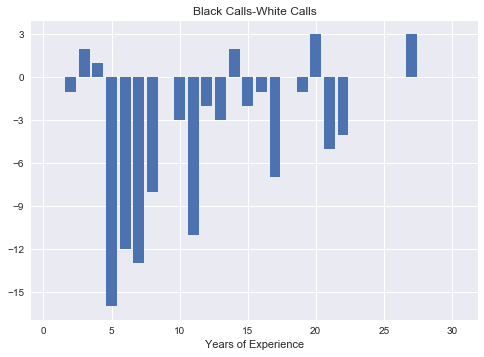

In [12]:
# Based on above cell, worth a quick plot
diff=np.empty(30)
exp=np.arange(1,31)

for i in range(1,30):
    diff[i]=np.sum(jbd.loc[jbd.yearsexp==i,"call"])-np.sum(jwd.loc[jwd.yearsexp==i,"call"])
tl=[-15,-12,-9,-6,-3,0,3]
plt.bar(exp,diff)
plt.xlabel("Years of Experience")
plt.yticks(tl)
plt.title("Black Calls-White Calls")
plt.show()


Plot above shows diference in call back rates across range of experiences.

In [16]:
#  Test null hypothesis

call_back_df=data.loc[data.call==1,:]
cbd=call_back_df
num_calls=cbd.call.count()

cbd["black_call"]= cbd["race"].apply(lambda x : 1 if x == 'b' else 0)
cbd_array=cbd.black_call.values

num_tests=20000
test_stat_array=np.empty(num_tests)
for j in range(num_tests):
    count=0
    for i in range(len(cbd_array)):
        bc_sample=np.random.choice(cbd.black_call,1,replace=True)
        if bc_sample==1:
            count+=1
    test_stat_array[j]=float(count)/num_calls
    
pvalue=np.sum(test_stat_array>=0.5)/float(num_tests)

print "pvalue %7.4f" % pvalue
    
    


C:\Users\Bill\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


pvalue  0.0000


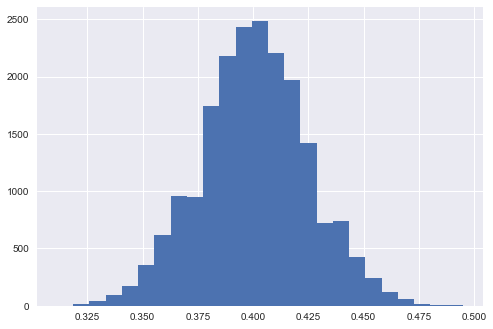

In [17]:
plt.hist(test_stat_array,bins=25)
plt.show()

In [18]:
#calculate margin of error for a 99% confidence
#

phat=np.sum(cbd_array)/float(num_calls)
percentile=np.empty(2)

std_err=np.sqrt(phat*(1.0-phat)/float(num_calls))
zval99=2.58
mar_err99=zval99*std_err
sample_mean=np.mean(cbd_array)

acc_rej="acepted"
if mar_err99+sample_mean<.5:
    acc_rej="rejected"
    
print "\nBased on this analysis,the mean of the number of calls to black names/total calls is: %5.2f with a \
+/- %4.2f percent margin of error" %(sample_mean, mar_err99)                                                                                                 
print "and the null hypothesis is",acc_rej
    



Based on this analysis,the mean of the number of calls to black names/total calls is:  0.40 with a +/- 0.06 percent margin of error
and the null hypothesis is rejected
